## 23BAI1202 Kantamneni Pranith 
## 23BAI1148 Suhas Koheda

## importing required libraries

In [15]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

## importing dataset

In [16]:
data = pd.read_csv('DATATHON_EVENT_DATASET.csv')
data.head()
full_data = data

In [17]:
data.dtypes

Time                             int64
Transaction_Type                object
Amount                         float64
Origin_ID                       object
Initial_Origin_Balance         float64
Final_Origin_Balance           float64
Destination_ID                  object
Initial_Destination_Balance    float64
Final_Destination_Balance      float64
Fraud                           object
Expected_Fraud                  object
dtype: object

## cleaning data

In [18]:
data['Origin_ID'] = data['Origin_ID'].astype(str)
data['Destination_ID'] = data['Destination_ID'].astype(str)
for index, i in enumerate(data["Origin_ID"]):
    if i[0].lower() == 'c':
        data.at[index, 'Origin_ID'] = 0
    elif i[0].lower() == 'm':
        data.at[index, 'Origin_ID'] = 1

for index, i in enumerate(data["Destination_ID"]):
    if i[0].lower() == 'c':
        data.at[index, 'Destination_ID'] = 0
    elif i[0].lower() == 'm':
        data.at[index, 'Destination_ID'] = 1
data

Time Transaction_Type      Amount Origin_ID  Initial_Origin_Balance  \
0       162         CASH_OUT   183806.32         0                19391.00   
1       137          PAYMENT      521.37         0                    0.00   
2       179          PAYMENT     3478.18         0                19853.00   
3       355          PAYMENT     1716.05         0                 5769.17   
4       354          CASH_IN   253129.93         0              1328499.49   
...     ...              ...         ...       ...                     ...   
58145   743         CASH_OUT   339682.13         0               339682.13   
58146   743         TRANSFER  6311409.28         0              6311409.28   
58147   743         CASH_OUT  6311409.28         0              6311409.28   
58148   743         TRANSFER   850002.52         0               850002.52   
58149   743         CASH_OUT   850002.52         0               850002.52   

       Final_Origin_Balance Destination_ID  Initial_Destination_Balance  \
0                      0.00              0                    382572.19   
1                      0.00              1                         0.00   
2                  16374.82              1                         0.00   
3                   4053.13              1                         0.00   
4                1581629.42              0                   2713220.48   
...                     ...            ...                          ...   
58145                  0.00              0                         0.00   
58146                  0.00              0                         0.00   
58147                  0.00              0                     68488.84   
58148                  0.00              0                         0.00   
58149                  0.00              0                   6510099.11   

       Final_Destination_Balance Fraud Expected_Fraud  
0                      566378.51    No             No  
1                           0.00    No             No  
2                           0.00    No             No  
3                           0.00    No             No  
4                     2460090.55    No             No  
...                          ...   ...            ...  
58145                  339682.13   Yes             No  
58146                       0.00   Yes             No  
58147                 6379898.11   Yes             No  
58148                       0.00   Yes             No  
58149                 7360101.63   Yes             No  

[58150 rows x 11 columns]

In [19]:
data = data[~((data['Origin_ID'] == 0) & (data['Initial_Origin_Balance'] == 0) & (data['Final_Origin_Balance'] == 0))]
data = data[~((data['Destination_ID'] == 0) & (data['Initial_Destination_Balance'] == 0) & (data['Final_Destination_Balance'] == 0))]
data

Time Transaction_Type      Amount Origin_ID  Initial_Origin_Balance  \
0       162         CASH_OUT   183806.32         0                19391.00   
2       179          PAYMENT     3478.18         0                19853.00   
3       355          PAYMENT     1716.05         0                 5769.17   
4       354          CASH_IN   253129.93         0              1328499.49   
5       321          PAYMENT    24768.57         0                21573.00   
...     ...              ...         ...       ...                     ...   
58141   742         CASH_OUT    63416.99         0                63416.99   
58143   743         CASH_OUT  1258818.82         0              1258818.82   
58145   743         CASH_OUT   339682.13         0               339682.13   
58147   743         CASH_OUT  6311409.28         0              6311409.28   
58149   743         CASH_OUT   850002.52         0               850002.52   

       Final_Origin_Balance Destination_ID  Initial_Destination_Balance  \
0                      0.00              0                    382572.19   
2                  16374.82              1                         0.00   
3                   4053.13              1                         0.00   
4                1581629.42              0                   2713220.48   
5                      0.00              1                         0.00   
...                     ...            ...                          ...   
58141                  0.00              0                    276433.18   
58143                  0.00              0                    503464.50   
58145                  0.00              0                         0.00   
58147                  0.00              0                     68488.84   
58149                  0.00              0                   6510099.11   

       Final_Destination_Balance Fraud Expected_Fraud  
0                      566378.51    No             No  
2                           0.00    No             No  
3                           0.00    No             No  
4                     2460090.55    No             No  
5                           0.00    No             No  
...                          ...   ...            ...  
58141                  339850.17   Yes             No  
58143                 1762283.33   Yes            NaN  
58145                  339682.13   Yes             No  
58147                 6379898.11   Yes             No  
58149                 7360101.63   Yes             No  

[36261 rows x 11 columns]

In [20]:
data = data[
    ~(
        # For CASH_IN transactions
        ((data["Transaction_Type"] == 'CASH_IN') & 
         (data['Final_Origin_Balance'] == 0) |
         (data['Initial_Destination_Balance'] == 0)) |
        # For CASH_OUT transactions
        ((data['Transaction_Type'] == 'CASH_OUT') & 
         (data['Final_Destination_Balance'] == 0) | 
         (data['Initial_Origin_Balance'] == 0))
    )
]
data

Time Transaction_Type      Amount Origin_ID  Initial_Origin_Balance  \
0       162         CASH_OUT   183806.32         0                19391.00   
4       354          CASH_IN   253129.93         0              1328499.49   
9       347          CASH_IN   266999.97         0              7411271.89   
10       15          CASH_IN    53230.73         0               895081.62   
14       41            DEBIT      819.35         0               274494.00   
...     ...              ...         ...       ...                     ...   
58139   742         CASH_OUT   258355.42         0               258355.42   
58141   742         CASH_OUT    63416.99         0                63416.99   
58143   743         CASH_OUT  1258818.82         0              1258818.82   
58147   743         CASH_OUT  6311409.28         0              6311409.28   
58149   743         CASH_OUT   850002.52         0               850002.52   

       Final_Origin_Balance Destination_ID  Initial_Destination_Balance  \
0                      0.00              0                    382572.19   
4                1581629.42              0                   2713220.48   
9                7678271.86              0                    386812.88   
10                948312.35              0                   7015146.49   
14                273674.65              0                    923509.57   
...                     ...            ...                          ...   
58139                  0.00              0                     25176.67   
58141                  0.00              0                    276433.18   
58143                  0.00              0                    503464.50   
58147                  0.00              0                     68488.84   
58149                  0.00              0                   6510099.11   

       Final_Destination_Balance Fraud Expected_Fraud  
0                      566378.51    No             No  
4                     2460090.55    No             No  
9                      119812.91    No             No  
10                    6961915.77    No             No  
14                     924328.92    No            NaN  
...                          ...   ...            ...  
58139                  283532.09   Yes             No  
58141                  339850.17   Yes             No  
58143                 1762283.33   Yes            NaN  
58147                 6379898.11   Yes             No  
58149                 7360101.63   Yes             No  

[20914 rows x 11 columns]

In [21]:
# Drop the 'Expected_Fraud' column as it contains many missing values and isn't critical
data_cleaned = data.drop(columns=['Expected_Fraud'])

# Encode categorical variables ('Transaction_Type', 'Origin_ID', 'Destination_ID', 'Fraud')
label = LabelEncoder()

data_cleaned['Transaction_Type'] = label.fit_transform(data_cleaned['Transaction_Type'])
data_cleaned['Origin_ID'] = label.fit_transform(data_cleaned['Origin_ID'])
data_cleaned['Destination_ID'] = label.fit_transform(data_cleaned['Destination_ID'])
data_cleaned['Fraud'] = label.fit_transform(data_cleaned['Fraud'])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd
import pickle

# Drop the 'Expected_Fraud' column as it contains many missing values and isn't critical
data_cleaned = data.drop(columns=['Expected_Fraud'])

# Encode categorical variables ('Transaction_Type', 'Origin_ID', 'Destination_ID', 'Fraud')
label = LabelEncoder()

data_cleaned['Transaction_Type'] = label.fit_transform(data_cleaned['Transaction_Type'])
data_cleaned['Origin_ID'] = label.fit_transform(data_cleaned['Origin_ID'])
data_cleaned['Destination_ID'] = label.fit_transform(data_cleaned['Destination_ID'])
data_cleaned['Fraud'] = label.fit_transform(data_cleaned['Fraud'])

# Define the features (X) and target (y)
x = data_cleaned.drop('Fraud',axis=1)
y = data_cleaned['Fraud']

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train,y_train)
model.score(x_test,y_test)
with open('Model.pkl','wb') as file:
    pickle.dump(model,file)

In [25]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Load a sample dataset
# Define your model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-Validation with Accuracy
accuracy_scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
print("Accuracy Scores:", accuracy_scores)
print("Mean Accuracy Score:", accuracy_scores.mean())

# Cross-Validation with Precision (weighted)
precision_scorer = make_scorer(precision_score, average='weighted')
precision_scores = cross_val_score(model, x, y, cv=cv, scoring=precision_scorer)
print("Precision Scores:", precision_scores)
print("Mean Precision Score:", precision_scores.mean())


# Cross-Validation with Recall (weighted)
recall_scorer = make_scorer(recall_score, average='weighted')
recall_scores = cross_val_score(model, x, y, cv=cv, scoring=recall_scorer)
print("Recall Scores:", recall_scores)
print("Mean Recall Score:", recall_scores.mean())

# Cross-Validation with F1 Score (weighted)
f1_scorer = make_scorer(f1_score, average='weighted')
f1_scores = cross_val_score(model, x, y, cv=cv, scoring=f1_scorer)
print("F1 Scores:", f1_scores)
print("Mean F1 Score:", f1_scores.mean())


Accuracy Scores: [0.98924217 0.9897203  0.98685154 0.9870906  0.99234816]
Mean Accuracy Score: 0.989050554537833
Precision Scores: [0.98921998 0.98969919 0.98701722 0.98723855 0.99249853]
Mean Precision Score: 0.9891346925713315
Recall Scores: [0.98924217 0.9897203  0.98685154 0.9870906  0.99234816]
Mean Recall Score: 0.989050554537833
F1 Scores: [0.98923    0.98970867 0.98691489 0.98714795 0.99239338]
Mean F1 Score: 0.9890789786986346


In [49]:
import pandas as pd

# Assuming you have already trained your model and split the data
# Generate predictions
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# Convert predictions to a pandas Series
y_pred_series = pd.Series(y_pred, name='Predictions')

# Display the Series
print(y_pred_series)


0        0
1        0
2        0
3        0
4        0
        ..
11625    0
11626    0
11627    0
11628    0
11629    0
Name: Predictions, Length: 11630, dtype: int64


count    11630.000000
mean         0.140843
std          0.347874
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Predictions, dtype: float64

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3620
           1       0.95      0.98      0.97       563

    accuracy                           0.99      4183
   macro avg       0.97      0.99      0.98      4183
weighted avg       0.99      0.99      0.99      4183



## code for ROC curve

AUC-ROC: 0.9991342256852105


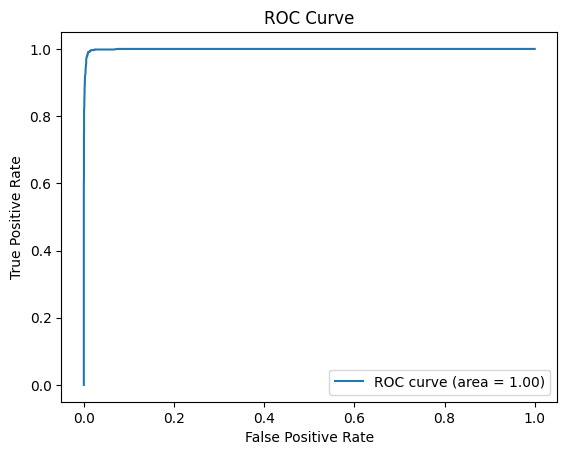

In [28]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get probabilities for positive class
y_proba = model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

print("AUC-ROC:", roc_auc)

# Plot ROC Curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Confusion Matrix:
[[3591   29]
 [  10  553]]


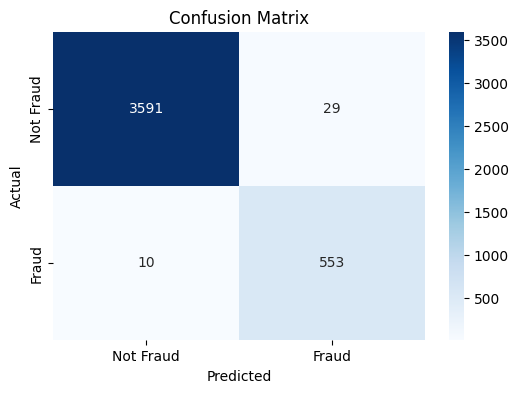

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your model and split the data
# Get the predictions from your model
y_pred = model.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


## Total 58000 Data

In [40]:
data.dtypes

Time                             int64
Transaction_Type                object
Amount                         float64
Origin_ID                       object
Initial_Origin_Balance         float64
Final_Origin_Balance           float64
Destination_ID                  object
Initial_Destination_Balance    float64
Final_Destination_Balance      float64
Fraud                           object
Expected_Fraud                  object
dtype: object

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd

# Drop the 'Expected_Fraud' column as it contains many missing values and isn't critical
data_cleaned = full_data.drop(columns=['Expected_Fraud'])

# Encode categorical variables ('Transaction_Type', 'Origin_ID', 'Destination_ID', 'Fraud')
label = LabelEncoder()

data_cleaned['Transaction_Type'] = label.fit_transform(data_cleaned['Transaction_Type'])
data_cleaned['Origin_ID'] = label.fit_transform(data_cleaned['Origin_ID'])
data_cleaned['Destination_ID'] = label.fit_transform(data_cleaned['Destination_ID'])
data_cleaned['Fraud'] = label.fit_transform(data_cleaned['Fraud'])

# Define the features (X) and target (y)
x = data_cleaned.drop('Fraud',axis=1)
y = data_cleaned['Fraud']

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train,y_train)
# model.score(x_test,y_test)

# Sample data similar to your test case
test_data = {
    'Time': [1609459200],
    'Transaction_Type': ['TRANSFER'],
    'Amount': [1000.50],
    'Origin_ID': ['A123'],
    'Initial_Origin_Balance': [5000.75],
    'Final_Origin_Balance': [4000.25],
    'Destination_ID': ['B456'],
    'Initial_Destination_Balance': [2000.00],
    'Final_Destination_Balance': [3000.50]
}

# Convert to DataFrame
test_df = pd.DataFrame(test_data)

# Label encode categorical columns
le_transaction = LabelEncoder()
le_origin = LabelEncoder()
le_destination = LabelEncoder()

test_df['Transaction_Type'] = le_transaction.fit_transform(test_df['Transaction_Type'])
test_df['Origin_ID'] = le_origin.fit_transform(test_df['Origin_ID'])
test_df['Destination_ID'] = le_destination.fit_transform(test_df['Destination_ID'])

# Drop non-numeric columns if your model expects only numeric features
# predictions = model.predict(test_df)  # Use your trained model here

# Example of transformed test_df for predictions
model.predict_proba(test_df)

array([[0.88, 0.12]])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming full_data is already defined and loaded

# Drop the 'Expected_Fraud' column as it contains many missing values and isn't critical
data_cleaned = full_data.drop(columns=['Expected_Fraud'])

# Encode categorical variables ('Transaction_Type', 'Origin_ID', 'Destination_ID', 'Fraud')
label = LabelEncoder()

data_cleaned['Transaction_Type'] = label.fit_transform(data_cleaned['Transaction_Type'])
data_cleaned['Origin_ID'] = label.fit_transform(data_cleaned['Origin_ID'])
data_cleaned['Destination_ID'] = label.fit_transform(data_cleaned['Destination_ID'])
data_cleaned['Fraud'] = label.fit_transform(data_cleaned['Fraud'])

# Define the features (X) and target (y)
x = data_cleaned.drop('Fraud', axis=1)
y = data_cleaned['Fraud']

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, print the classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[9948   35]
 [  42 1605]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9983
           1       0.98      0.97      0.98      1647

    accuracy                           0.99     11630
   macro avg       0.99      0.99      0.99     11630
weighted avg       0.99      0.99      0.99     11630



## Testing Data

In [32]:
data = pd.read_csv('DATATHON_Test.csv')
data

Time Transaction_Type     Amount    Origin_ID  Initial_Origin_Balance  \
0     181         CASH_OUT  341092.14  C1548865199                   83.00   
1     214          PAYMENT    2991.98  C1130529352                87924.00   
2     397         CASH_OUT  113379.53  C1062265887                    0.00   
3     381         CASH_OUT  275918.03  C2024304240               114842.79   
4     303         CASH_OUT  358047.67   C993628011                    0.00   
..    ...              ...        ...          ...                     ...   
558   394         CASH_OUT   22980.50  C1402573410                    0.00   
559   308         CASH_OUT  180737.68  C1225783216                10882.00   
560   485         TRANSFER  471906.60    C17156930               471906.60   
561    16         CASH_OUT  110572.83   C827840146                    0.00   
562   185         TRANSFER   85848.20  C1322698482                    0.00   

     Final_Origin_Balance Destination_ID  Initial_Destination_Balance  \
0                    0.00    C2101446901                   2948712.03   
1                84932.02    M1686772488                         0.00   
2                    0.00      C81673491                    224827.78   
3                    0.00    C1698511579                    530538.61   
4                    0.00     C717286654                    907340.96   
..                    ...            ...                          ...   
558                  0.00     C304380954                    185047.57   
559                  0.00    C1162636892                       776.81   
560                  0.00    C1931513332                         0.00   
561                  0.00     C512949725                    459271.06   
562                  0.00    C1837128699                   2473604.65   

     Final_Destination_Balance Fraud Expected_Fraud  
0                   3289804.17    No             No  
1                         0.00    No             No  
2                    338207.31    No             No  
3                    806456.63    No             No  
4                   1265388.63    No             No  
..                         ...   ...            ...  
558                  208028.06    No             No  
559                  181514.49    No             No  
560                       0.00   Yes            Yes  
561                  436173.50    No             No  
562                 2559452.85    No             No  

[563 rows x 11 columns]

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import pandas as pd

# Drop the 'Expected_Fraud' column as it contains many missing values and isn't critical
data_cleaned = data.drop(columns=['Expected_Fraud'])

# Encode categorical variables ('Transaction_Type', 'Origin_ID', 'Destination_ID', 'Fraud')
label = LabelEncoder()

data_cleaned['Transaction_Type'] = label.fit_transform(data_cleaned['Transaction_Type'])
data_cleaned['Origin_ID'] = label.fit_transform(data_cleaned['Origin_ID'])
data_cleaned['Destination_ID'] = label.fit_transform(data_cleaned['Destination_ID'])
data_cleaned['Fraud'] = label.fit_transform(data_cleaned['Fraud'])

# Define the features (X) and target (y)
x = data_cleaned.drop('Fraud',axis=1)
y = data_cleaned['Fraud']

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9823008849557522

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Assuming full_data is already defined and loaded

# Drop the 'Expected_Fraud' column as it contains many missing values and isn't critical
data_cleaned = data.drop(columns=['Expected_Fraud'])

# Encode categorical variables ('Transaction_Type', 'Origin_ID', 'Destination_ID', 'Fraud')
label = LabelEncoder()

data_cleaned['Transaction_Type'] = label.fit_transform(data_cleaned['Transaction_Type'])
data_cleaned['Origin_ID'] = label.fit_transform(data_cleaned['Origin_ID'])
data_cleaned['Destination_ID'] = label.fit_transform(data_cleaned['Destination_ID'])
data_cleaned['Fraud'] = label.fit_transform(data_cleaned['Fraud'])

# Define the features (X) and target (y)
x = data_cleaned.drop('Fraud', axis=1)
y = data_cleaned['Fraud']

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Optionally, print the classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[98  1]
 [ 1 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        99
           1       0.93      0.93      0.93        14

    accuracy                           0.98       113
   macro avg       0.96      0.96      0.96       113
weighted avg       0.98      0.98      0.98       113



In [35]:
import pickle

In [36]:
with open('Check.pkl','wb') as file:
    pickle.dump(model,file)